In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_csv(r"./Data/clustered_data.csv")

In [6]:
df

,Education,Marital Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Catalog,Store,NumWebVisitsMonth,Age,Children,total_spend,total_promo,Parental_status,Days_as_Customer,cluster
0,2,0,58138.0,58,635,81,546,120.5,81,88.0,...,10,4,7,68,0,1617.0,0,0,4684.0,0
1,2,0,46344.0,38,11,1,6,2.0,1,6.0,...,1,2,5,71,2,27.0,0,1,4134.0,1
2,2,1,71613.0,26,426,49,127,111.0,21,42.0,...,2,10,4,60,0,776.0,0,0,4333.0,0
3,2,1,26646.0,26,11,4,20,10.0,3,5.0,...,0,4,6,41,1,53.0,0,1,4160.0,1
4,4,1,58293.0,94,173,43,118,46.0,27,15.0,...,3,6,5,44,1,422.0,0,1,4182.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,61223.0,46,709,43,182,42.0,81,126.5,...,3,4,5,58,1,1341.0,0,1,4402.0,2
2236,4,1,64014.0,56,406,0,30,0.0,0,8.0,...,2,5,7,79,3,444.0,1,1,4040.0,2
2237,2,0,56981.0,91,908,48,217,32.0,12,24.0,...,3,13,6,44,0,1241.0,1,0,4176.0,0
2238,3,1,69245.0,8,428,30,214,80.0,30,61.0,...,5,10,3,69,1,843.0,0,1,4177.0,0


In [7]:
df['cluster'].unique()

array([0, 1, 2])

In [8]:
print(df.shape)

(2240, 22)


In [9]:
#now classify the df into x(independent variable) and y(dependent variable)
x=df.drop("cluster",axis=1)
y=df['cluster'] 

In [10]:
x.head()

,Education,Marital Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Web,Catalog,Store,NumWebVisitsMonth,Age,Children,total_spend,total_promo,Parental_status,Days_as_Customer
0,2,0,58138.0,58,635,81,546,120.5,81,88.0,...,8,10,4,7,68,0,1617.0,0,0,4684.0
1,2,0,46344.0,38,11,1,6,2.0,1,6.0,...,1,1,2,5,71,2,27.0,0,1,4134.0
2,2,1,71613.0,26,426,49,127,111.0,21,42.0,...,8,2,10,4,60,0,776.0,0,0,4333.0
3,2,1,26646.0,26,11,4,20,10.0,3,5.0,...,2,0,4,6,41,1,53.0,0,1,4160.0
4,4,1,58293.0,94,173,43,118,46.0,27,15.0,...,5,3,6,5,44,1,422.0,0,1,4182.0


In [14]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: cluster
Non-Null Count  Dtype
--------------  -----
2240 non-null   int64
dtypes: int64(1)
memory usage: 17.6 KB


In [15]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
x_train.shape

(1792, 21)

In [18]:
x_test.shape

(448, 21)

In [21]:
!pip install xgboost
!pip install catboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 5.4 MB/s eta 0:00:28
    --------------------------------------- 2.1/150.0 MB 6.2 MB/s eta 0:00:24
    --------------------------------------- 3.1/150.0 MB 6.5 MB/s eta 0:00:23
   - -------------------------------------- 4.2/150.0 MB 5.4 MB/s eta 0:00:27
   - -------------------------------------- 4.7/150.0 MB 4.9 MB/s eta 0:00:30
   - -------------------------------------- 5.2/150.0 MB 4.7 MB/s eta 0:00:31
   - -------------------------------------- 5.5/150.0 MB 4.3 MB/s eta 0:00:34
   - -------------------------------------- 5.8/150.0 MB 4.0 MB/s eta 0:00:36
   - -------------------------------------- 6.3/150.0 MB 3.6 MB/s eta 0:00:41
   - -------------------------------------- 6.8/150.0 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 7.1/150.0 MB 3.3 MB/s eta 0:00:43
   -- ------------------------------------- 7.6/150.0 MB 3.2 MB/s eta 0


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
    --------------------------------------- 1.8/102.4 MB 15.0 MB/s eta 0:00:07
   - -------------------------------------- 3.1/102.4 MB 8.9 MB/s eta 0:00:12
   - -------------------------------------- 5.0/102.4 MB 9.8 MB/s eta 0:00:10
   -- ------------------------------------- 6.6/102.4 MB 8.4 MB/s eta 0:00:12
   -- ------------------------------------- 7.3/102.4 MB 8.0 MB/s eta 0:00:12
   --- ------------------------------------ 7.9/102.4 MB 6.7 MB/s eta 0:00:15
   --- ------------------------------------ 8.4/102.4 MB 6.3 MB/s eta 0:00:16
   --- ------------------------------------ 8.9/102.4 MB 6.0 MB/s eta 0:00:16
   --- ------------------------------------ 9.4/102.4 MB 5.3 MB/s eta 0:00:18
   --- ------------------------------------ 10.0/102.4 MB 5.0 MB/s eta 0:00:19
   ---- ----------------------------------- 10.5/102.4 MB 4.8 MB/s eta 0:00:20
   ---- ----------------------------------- 11.3/102.4 MB 4.7 MB/s e


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
#grid search cv for selectin best model form the multiple model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics 


In [39]:
#creating a dictionary of all the object of the algorithm above
models={
    "logictic":LogisticRegression(),
    "randomforest":RandomForestClassifier(),
    "adaboost":AdaBoostClassifier(),
    "gradient":GradientBoostingClassifier(),
    "kneighbour":KNeighborsClassifier(),
    "decisiontree":DecisionTreeClassifier(),
    "svc":SVC(),
    "xgboost":XGBClassifier(),
    "catboost":CatBoostClassifier(verbose=False)
}

In [40]:
models

{'logictic': LogisticRegression(),
 'randomforest': RandomForestClassifier(),
 'adaboost': AdaBoostClassifier(),
 'gradient': GradientBoostingClassifier(),
 'kneighbour': KNeighborsClassifier(),
 'decisiontree': DecisionTreeClassifier(),
 'svc': SVC(),
 'xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [42]:
#fuction which evaluates the model for selecting the best model form them
def evaluate(models,x_train,y_train,x_test,y_test):

    model_name=[]
    pred_score=[]

    for i in range (len(list(models))):
        model=list(models.values())[i]
        #traing the model
        model.fit(x_train,y_train)

        #predicting the model
        y_pred=model.predict(x_test)
        score=accuracy_score(y_test,y_pred)
        name=list(models.keys())[i]
        print("the accuracy score for the model "f'{name} is {score}')
        model_name.append(name)
        pred_score.append(score)

    print()
    data=pd.DataFrame()
    data['Name']=model_name
    data['Score']=pred_score
    return data


In [43]:
data=evaluate(models,x_train,y_train,x_test,y_test)

the accuracy score for the model logictic is 0.875
the accuracy score for the model randomforest is 0.953125
the accuracy score for the model adaboost is 0.9441964285714286
the accuracy score for the model gradient is 0.9620535714285714
the accuracy score for the model kneighbour is 0.8303571428571429
the accuracy score for the model decisiontree is 0.9330357142857143
the accuracy score for the model svc is 0.765625
the accuracy score for the model xgboost is 0.9620535714285714
the accuracy score for the model catboost is 0.9665178571428571



In [46]:
data.sort_values('Score')

,Name,Score
6,svc,0.765625
4,kneighbour,0.830357
0,logictic,0.875000
5,decisiontree,0.933036
2,adaboost,0.944196
1,randomforest,0.953125
3,gradient,0.962054
7,xgboost,0.962054
8,catboost,0.966518


In [47]:
#so catboost is giving the highest accuracy so we use catbooost
from catboost import CatBoostClassifier

model=CatBoostClassifier(verbose=False)

In [57]:
#applying the grid searcah cv 
from sklearn.model_selection import RandomizedSearchCV
param = {
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'iterations': [200, 500],
    'l2_leaf_reg': [1, 3],
}

grid = RandomizedSearchCV(estimator=model,
                    param_distributions=params,
                    n_iter=25,
                    scoring='accuracy',
                    cv=5,  # all CPU cores
                    verbose=1)

In [58]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


,estimator,<catboost.cor...00257E5972B10>
,param_distributions,"{'bagging_temperature': [0.1, 0.5, ...], 'border_count': [32, 50, ...], 'depth': [4, 6, ...], 'iterations': [100, 200, ...], ...}"
,n_iter,25
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [60]:
print(grid.best_score_)

0.9782418574251878


In [61]:
grid.best_params_

{'random_strength': 5,
 'learning_rate': 0.1,
 'l2_leaf_reg': 1,
 'iterations': 1000,
 'depth': 8,
 'border_count': 50,
 'bagging_temperature': 0.1}

In [63]:
y_pred=grid.best_estimator_.predict(x_test)
accuracy_score(y_test,y_pred)

0.9665178571428571

In [64]:
model=CatBoostClassifier(random_strength=5,learning_rate=0.1,l2_leaf_reg=1,iterations=100,depth=8,border_count=50,bagging_temperature=0.1)

In [65]:
model.fit(x_train,y_train)

0:	learn: 0.9468284	total: 5.49ms	remaining: 544ms
1:	learn: 0.8314001	total: 6.63ms	remaining: 325ms
2:	learn: 0.7561465	total: 10.5ms	remaining: 340ms
3:	learn: 0.6834312	total: 14.5ms	remaining: 349ms
4:	learn: 0.6171328	total: 17.5ms	remaining: 333ms
5:	learn: 0.5654901	total: 21.8ms	remaining: 342ms
6:	learn: 0.5252458	total: 25.3ms	remaining: 336ms
7:	learn: 0.4832721	total: 29.3ms	remaining: 337ms
8:	learn: 0.4472819	total: 31.5ms	remaining: 319ms
9:	learn: 0.4110900	total: 35.5ms	remaining: 319ms
10:	learn: 0.3797475	total: 40.9ms	remaining: 331ms
11:	learn: 0.3543472	total: 47ms	remaining: 345ms
12:	learn: 0.3321204	total: 49.1ms	remaining: 329ms
13:	learn: 0.3111328	total: 52.2ms	remaining: 321ms
14:	learn: 0.2922561	total: 55.7ms	remaining: 316ms
15:	learn: 0.2744055	total: 58.7ms	remaining: 308ms
16:	learn: 0.2588377	total: 62.7ms	remaining: 306ms
17:	learn: 0.2449094	total: 66.2ms	remaining: 302ms
18:	learn: 0.2320361	total: 69.6ms	remaining: 297ms
19:	learn: 0.2180705	tot

In [66]:
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9665178571428571

In [67]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[111,   1,   6],
       [  0, 192,   1],
       [  4,   3, 130]])

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       118
           1       0.98      0.99      0.99       193
           2       0.95      0.95      0.95       137

    accuracy                           0.97       448
   macro avg       0.96      0.96      0.96       448
weighted avg       0.97      0.97      0.97       448



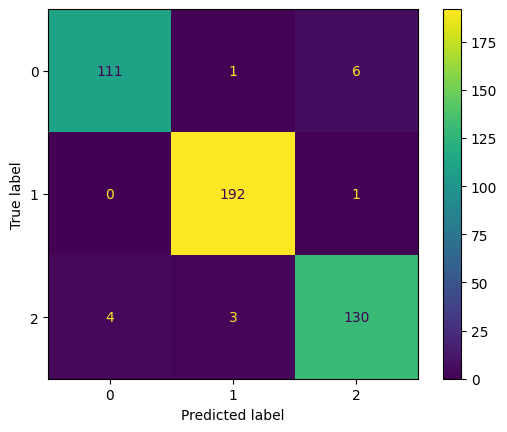

In [72]:
#display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

In [73]:
import pickle
import os

# Save the trained model inside 'Data' folder
with open("Data/model.pkl", "wb") as f:
    pickle.dump(model, f)
